# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merge = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_study_merge["Mouse ID"].unique())
mouse_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_merge[mouse_study_merge.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_ids = np.array(duplicate_mice["Mouse ID"].unique())
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=mouse_study_merge[mouse_study_merge["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_merge[mouse_study_merge["Mouse ID"] != "g989"]
mouse_study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_study_cleaned["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_study_drug_tumor= mouse_study_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=mouse_study_drug_tumor.mean()
median=mouse_study_drug_tumor.median()
variance=mouse_study_drug_tumor.var()
standard_deviation=mouse_study_drug_tumor.std()
sem=mouse_study_drug_tumor.sem()
# Assemble the resulting series into a single summary DataFrame.
mouse_study_summary = pd.DataFrame({"Mean Tumor Volume": mean,
                                    "Median Tumor Volume": median,
                                    "Tumor Volume Variance": variance,
                                    "Tumor Volume Std. Dev.": standard_deviation,
                                    "Tumor Volume Std. Err.": sem})
mouse_study_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_drug_tumor= mouse_study_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(
    mean = pd.Series.mean,
    median = pd.Series.median,
    var = pd.Series.var,
    std = pd.Series.std,
    sem = pd.Series.sem
)
mouse_study_drug_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

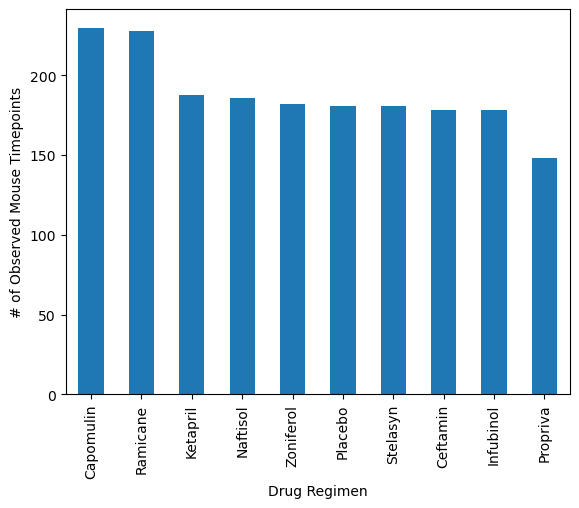

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_type = mouse_study_cleaned.groupby("Drug Regimen")
drug_counts = drug_type["Drug Regimen"].count()
drug_counts = drug_counts.sort_values(ascending=False)

drug_chart = drug_counts.plot(kind="bar",figsize=(6.5,5))

drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()








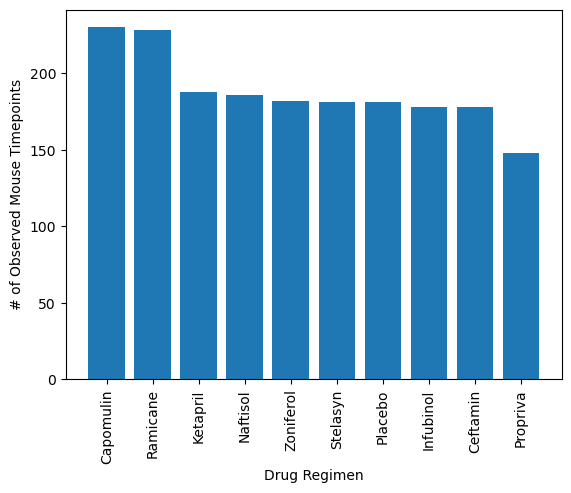

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = mouse_study_cleaned["Drug Regimen"].value_counts()
x_drugs = drug_count.index
y_mouse_rows = drug_count.values

plt.bar(x_drugs,y_mouse_rows,align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")


plt.show()

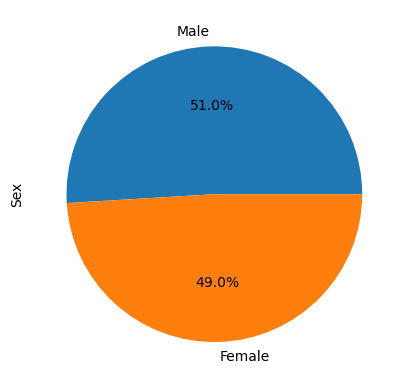

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_study_cleaned.groupby("Sex")
mouse_counts = mouse_sex["Sex"].count()

mouse_counts = mouse_counts.sort_values(ascending=False)
mouse_counts.plot(kind="pie",autopct="%1.1f%%")


plt.show()


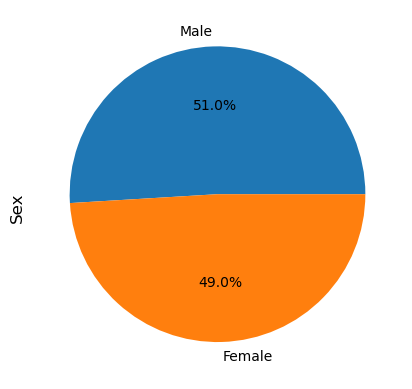

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_study_cleaned.groupby("Sex")
mouse_counts = mouse_sex["Sex"].count()
mouse_counts 

sex = ["Male", "Female"]
count= ["958", "922"]
plt.suptitle("Sex",x=.2, y=.5, rotation=90)
plt.pie(count, labels=sex, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = mouse_study_cleaned.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume_df = pd.merge(greatest_timepoint_df, mouse_study_cleaned, how="left",on=["Mouse ID", "Timepoint"])

# Calculate the final tumor volume of each mouse across four of the treatment regimens:")
treatment_regimens = pd.DataFrame({"Drug Regimen": ["Capomulin", "Infubinol","Ramicane", "Ceftamin"]})
final_tumor_volume_df = pd.merge(treatment_regimens, last_tumor_volume_df, how="left",on=["Drug Regimen"])

final_tumor_volume_df.index=range(1,len(final_tumor_volume_df)+1)
final_tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
1,Capomulin,b128,45,38.982878,2,Female,9,22
2,Capomulin,b742,45,38.939633,0,Male,7,21
3,Capomulin,f966,20,30.485985,0,Male,16,17
4,Capomulin,g288,45,37.074024,1,Male,3,19
5,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
96,Ceftamin,x226,0,45.000000,0,Male,23,28
97,Ceftamin,x581,45,64.634949,3,Female,19,28
98,Ceftamin,x822,45,61.386660,3,Male,3,29
99,Ceftamin,y769,45,68.594745,4,Female,6,27


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_vol)
    
    # Calculate the IQR
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
  
    print(f"{treatment}'s potential outliers:", tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)])
 


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

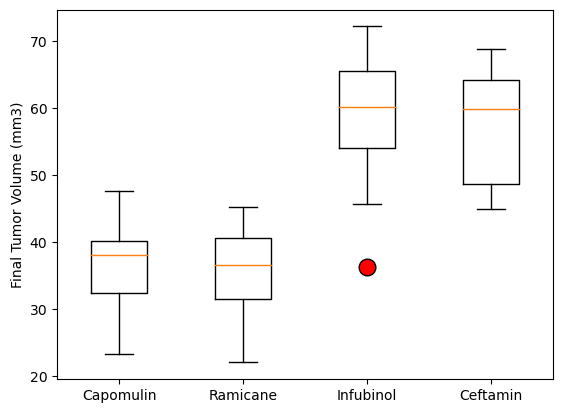

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume_data, labels=treatments, flierprops={"marker": "o", "markerfacecolor": "red", "markersize":12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

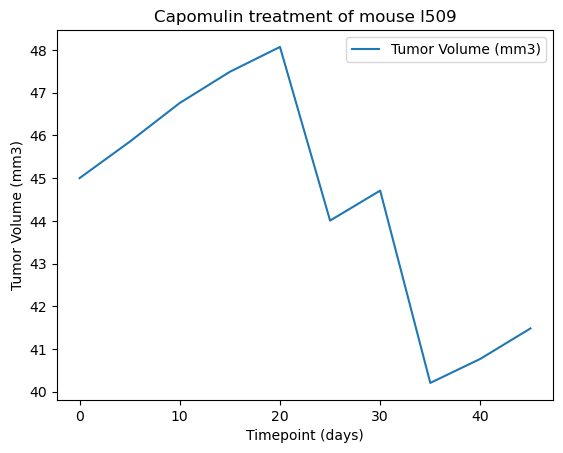

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_results = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]
mouse_l509 = capomulin_results[capomulin_results["Mouse ID"] == "l509"]
mouse_l509.plot(kind="line", x="Timepoint",y="Tumor Volume (mm3)", title="Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

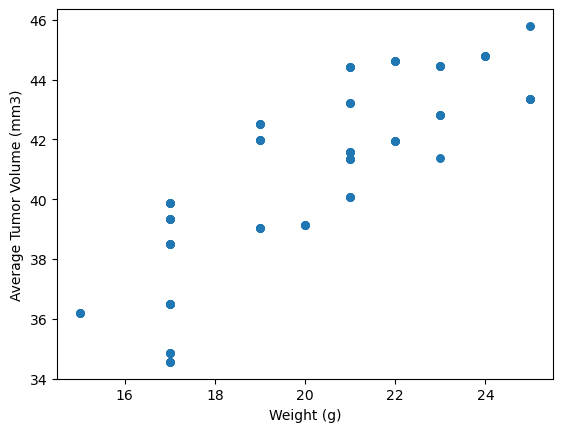

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_results = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]
cap_avg_tumor_data = capomulin_results.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cap_avg_tumor_data
weight_df = pd.merge(capomulin_results, cap_avg_tumor_data, on="Mouse ID")
weight_df.rename(columns={"Tumor Volume (mm3)_y":"Average Tumor Volume"
                          , "Tumor Volume (mm3)_x":"Tumor Volume (mm3)"}, inplace=True)
capomulin_weight_df=weight_df[["Mouse ID", "Weight (g)", "Average Tumor Volume"]]
capomulin_weight_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", s=25)
plt.ylabel("Average Tumor Volume (mm3)")      


## Correlation and Regression

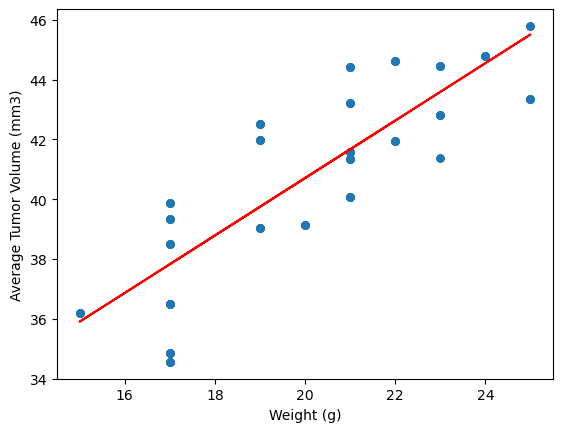

In [95]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = capomulin_weight_df["Weight (g)"]
y_values = capomulin_weight_df["Average Tumor Volume"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, s=25)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0.5, 0.5), color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
                                                